# Introduction
Welcome to Part III. In Part II, we carefully combed through the two datasets and performed both univariate and bivariate analyses on features. 

In that Part, the analysis were done separately. If you repeated what you did on H1.csv on H2.csv, you would have noticed that the distribution of values are somewhat different. 

This is no surprise, since H1 is a resort hotel and H2 is a city hotel. 

In this Part, we will pick out a few features from both datasets for comparison and statistical tests.

### Step 1: Import the libraries
First, let's import the same libraries as you did in Part II, namely:
1. pandas as pd
2. matplotlib.pyplot as plt
3. seaborn as sns
4. stats from scipy

In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import numpy as np

### Step 2: Load the CSVs from Part I
Once again, read the two cleaned CSVs that you exported from Part I into DataFrames.

In [2]:
## Step 2: Load the CSVs into DataFrames
h1 = pd.read_csv("H1_clean.csv")
h2 = pd.read_csv("H2_clean.csv")

## Compare and contrast
Based on the results in Part II (make sure you do them), we will ask questions and compare selected features between the two datasets, along with statistical testing.

One useful tip when there are overlapping plots - the alpha parameter increases transparency. Try alpha=0.5. 

### Step 3: Compare IsCanceled
<blockquote>Is the cancellation different between H1 and H2?</blockquote>
We would have found out when we plotted them separately but let's plot them side by side to illustrate the proportion patterns between the two.

This is useful if you want to present the results to your hotel boss.

<details>
    <summary><font color = 'green'>Click here once for a hint if you've no idea where to start</font></summary>
    <div>
        <strong>Google "plot two countplots side by side"</strong>
    </div>
</details>

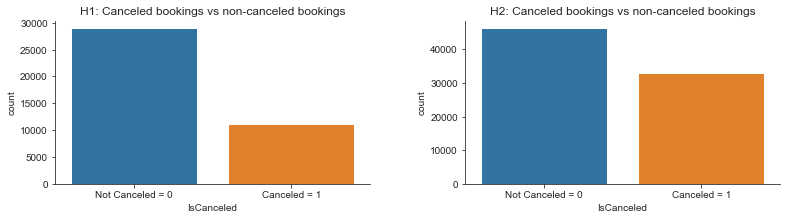

In [3]:
# Step 3: Compare IsCanceled
# H1: Resort Hotel
plt.figure(figsize=(13,3))
sns.set_palette("tab10")
sns.set_style("ticks")
ax = plt.subplot(1,2,1)
sns.countplot(h1["IsCanceled"])
ax.set_xticklabels(["Not Canceled = 0", "Canceled = 1"])
plt.title("H1: Canceled bookings vs non-canceled bookings")
# H2: City Hotel
ax = plt.subplot(1,2,2)
sns.countplot(h2["IsCanceled"])
sns.despine()
plt.title("H2: Canceled bookings vs non-canceled bookings")
ax.set_xticklabels(["Not Canceled = 0", "Canceled = 1"])
plt.subplots_adjust(wspace=0.3)
plt.show()

### Step 4: Compare Leadtime 
<blockquote>Do the hotels have the same lead time for bookings?</blockquote>
...asked your boss. 

Let's find out by plotting a histogram on top of each other first. You should expect a single plot with both histograms together, no separately, i.e. two plots.

Don't forget to change the transparency with the alpha parameter in your plot.

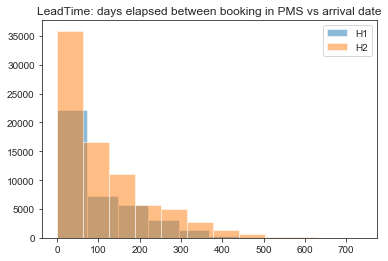

In [4]:
# Step 4: Plot histograms on LeadTime for both datasets
# H1: Resort Hotel
plt.close("all")
plt.hist(h1["LeadTime"], alpha=0.5, label="H1")
plt.title("LeadTime: days elapsed between booking in PMS vs arrival date")
# H2: City Hotel
plt.hist(h2["LeadTime"], alpha=0.5, label="H2")
plt.legend()
plt.show()

### [Optional] Normalize the histograms
If you plotted the histograms normally, you'd find that it's hard to compare the two distributions, except that they <em>look</em> similar. 

Assuming you were using matplotlib.pyplot, let's replot them except we'll change the <strong>density</strong> parameter to <strong><font color = 'green'>True</font></strong> just to normalize both.

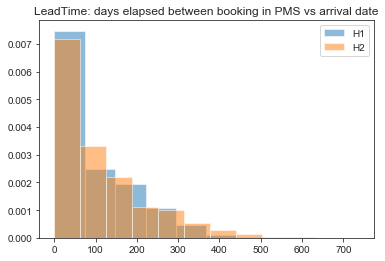

In [5]:
# Optional: Repeat Step 4, but with density parameter changed
# H1: Resort Hotel
plt.close("all")
plt.hist(h1["LeadTime"], alpha=0.5, label="H1", density=True)
plt.title("LeadTime: days elapsed between booking in PMS vs arrival date")
# H2: City Hotel
plt.hist(h2["LeadTime"], alpha=0.5, label="H2", density=True)
plt.legend()
plt.show()

### Step 5: Conduct a Mann-Whitney U test to test the difference between LeadTime
They still look kind of the same, so let's conduct a statistical test of difference. 

The distributions don't look normal at all, so we can use Mann-Whitney U test. 

What can you tell your boss, after conducting this test?

In [6]:
# Step 5: Conduct a Mann-Whitney U test between H1 and H2

import scipy.stats as stats
statistic, pval = stats.mannwhitneyu(h1["LeadTime"], h2["LeadTime"])
print("p_value: " + str(pval))
print("\n")
print("The leadtimes for these two datasets are significantly different")

p_value: 5.2696226592688776e-191


The leadtimes for these two datasets are significantly different


### Step 6: Compare ADR 
<blockquote>How are our two hotels' ADR compared to each other?</blockquote>
...your boss asked next. As mentioned, ADR is an important metric for a hotel's performance so we'd be interested to see how these two hotels stack up against each other. 

No sweat, you've done this before so let's repeat what you did for LeadTime (Step 4).

Plot H1's ADR histogram with H2's. No density = True so we can see the histograms plotted using the raw data.

What do you see?

<details>
    <summary><font color = 'green'>Click here once after you are done to check if you got the same plot</font></summary>
    <div>
        <img src = 'https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHotelDemand/H1H2ADRHistogram.png'>
    </div>
</details>

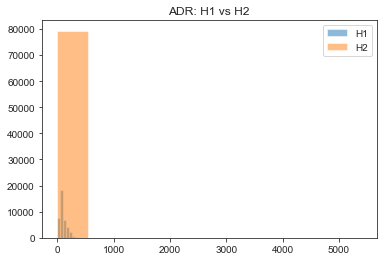

In [7]:
# Step 6: Plot both hotels' ADR together

plt.close("all")
plt.hist(h1["ADR"], alpha=0.5, label="H1")
plt.hist(h2["ADR"], alpha=0.5, label="H2")
plt.legend()
plt.title("ADR: H1 vs H2")
plt.show()

### Step 7: Identify outlier from H2
Turns out if you plotted H1 and H2 ADR as is on a histogram, you're going to see that everything in H1 is hidden behind H2. 

That's because the histogram for H2 is slightly messed up - you might have seen this in Part II during the EDA as well. 

To fix this, let's identify the outlier in H2 that's messing the plot up. 

Firstly, use the .describe method on H2's ADR and examine the interquartile distribution. That's because we want to see what the quartiles look like and setting a cutoff.

Secondly, take a look at the values between 75% and max - what do you see?

In [8]:
# Step 7: Use .describe() on H2's ADR

h2["ADR"].describe()

count    79330.000000
mean       105.304465
std         43.602954
min          0.000000
25%         79.200000
50%         99.900000
75%        126.000000
max       5400.000000
Name: ADR, dtype: float64

### Step 8: Remove outlier from H2's ADR
Now that you've seen the two values at 75% and max, you'll have to make a call on what's the ADR value to remove.

Experiment with different cutoff values, and see if you can identify the row containing the outlier.

Clean H2 afterwards by removing the row containing the outlier ADR and save the cleaned DataFrame in a different variable.

<details>
    <summary><font color = 'green'>Click here once if you are unsure what the cutoff is</font></summary>
    <div>
        <strong>Anything >510 is ok. The outlier is found in row 8455 and you should be removing only one row.</strong>
    </div>
</details>

In [9]:
# Step 8: Clean H2 by removing the outlier in ADR

# Identify outlier
h2_sorted = np.sort(h2["ADR"])
print(h2_sorted[-15:])
# Get outlier index
outlier_index = h2[h2["ADR"] == 5400].index
print(outlier_index)
#outlier_index = h2[h2["ADR"] == 510].index
#print(outlier_index)
print("\n")
# Remove outlier from df
h2_clean = h2.drop(index=8455)
# Verify
h2_clean_sorted = np.sort(h2_clean["ADR"])
print(h2_clean_sorted[-5:])
h2_clean["ADR"].describe()

[ 332.57  333.67  335.    335.    336.    338.    345.    349.63  352.5
  365.    372.33  375.5   451.5   510.   5400.  ]
Int64Index([8455], dtype='int64')


[365.   372.33 375.5  451.5  510.  ]


count    79329.000000
mean       105.237722
std         39.342675
min          0.000000
25%         79.200000
50%         99.900000
75%        126.000000
max        510.000000
Name: ADR, dtype: float64

### Step 9: Repeat Step 6 and compare ADR
Now that you've removed the offending row in H2, plot the histograms of H1 and H2's ADR again for comparison.

If you've removed the correct row in H2, you'll be pleasantly surprised at the resulting plot.

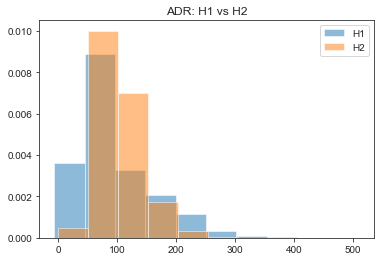

In [10]:
# Step 9: Repeat Step 6 and replot the histograms

plt.close("all")
plt.hist(h1["ADR"], alpha=0.5, label="H1", density=True)
plt.hist(h2_clean["ADR"], alpha=0.5, label="H2", density=True)
plt.legend()
plt.title("ADR: H1 vs H2")
plt.show()

### Step 10: Conduct a Mann-Whitney U test to test the difference between ADR
Let's conduct a Mann-Whitney U test to statistically compare the mean of the two distributions.

Do two - one for H1 and H2, and another one for H1 and H2 with the outlier removed.

In [11]:
# Step 10a: Conduct a Mann-Whitney test for H1 and H2 ADR

statistic, pval = stats.mannwhitneyu(h1["ADR"], h2["ADR"])
print("p_val with outlier = " + str(pval))



p_val with outlier = 0.0


In [12]:
# Step 10b: Conduct a Mann-Whitney test for H1 and cleaned H2 ADR

statistic, pval = stats.mannwhitneyu(h1["ADR"], h2_clean["ADR"])
print("p_val without outlier = " + str(pval))

p_val without outlier = 0.0


### Step 11: Get a DataFrame of bookings per month, separated by year for H1
Let's do some data transformation to get a table containing the following data:

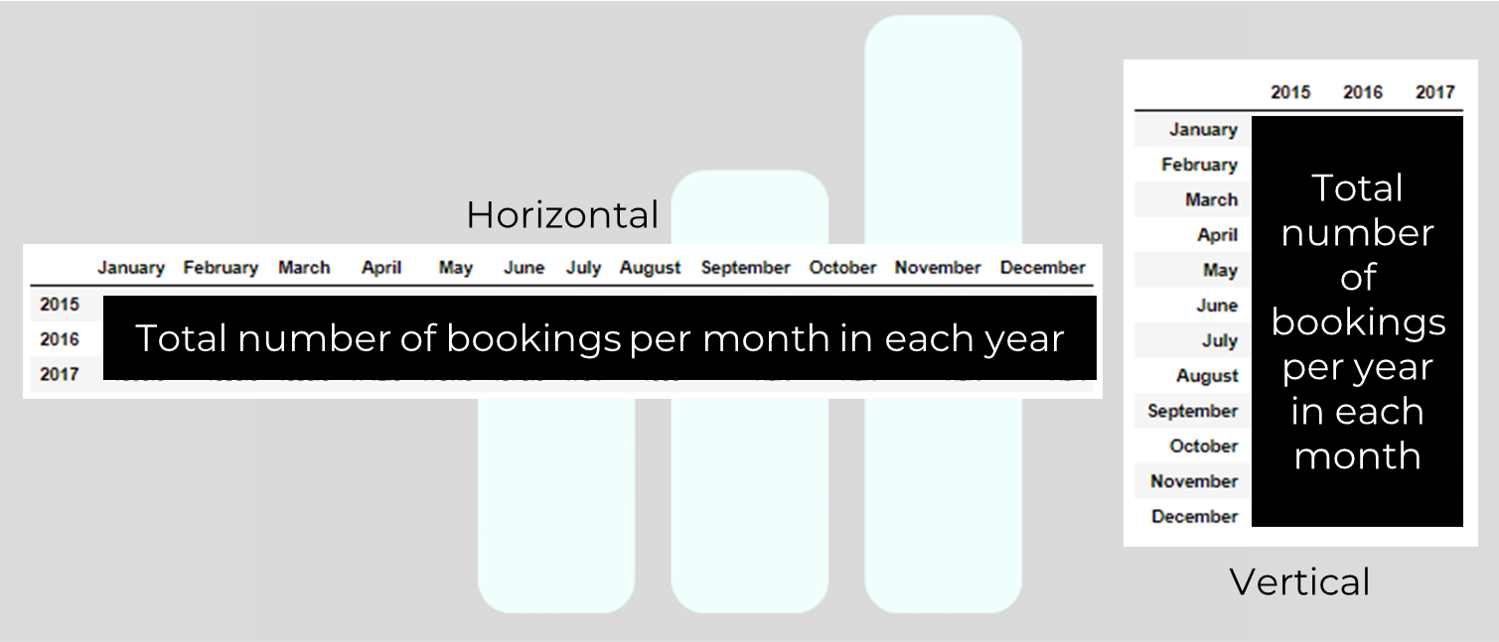

Either the horizontal or the vertical form are fine. 

There are a few ways to do this, so we'll let you give it a try. If you need more help or ideas, click our hint button below.

<details>
    <summary><font color = 'green'>Click here once if you need ideas</font></summary>
    <div>
        <p></p>
        <ol>
            <li>Get three DataFrames, each containing rows from 2015, 2016, and 2017 <strong>only</strong></li>
            <li>For each DataFrame, perform a groupby operation where you are counting how many rows there are in each ArrivalDateMonth</li>
            <li>Concatenate the three DataFrames into a new DataFrame</li>
            <li>Rename the indices with .index into 2015, 2016, 2017</li>
            <li>Rearrange the columns by their months</li>
        </ol>
    </div>
</details>

<details>
    <summary><font color = 'green'>Click here once to see the actual values in the DataFrame (spoilers)</font></summary>
    <div>
        <img src = 'https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHotelDemand/H1H2_GroupbyDataFrame.png'>
    </div>
</details>

In [13]:
# Step 11a: Get the transformed DataFrame from H1.csv
print("H1 (Resort): Bookings per month grouped by year")
print("\n")
h1_filtered = h1[["ArrivalDateYear", "ArrivalDateMonth", "Country"]]
h1_grouped = h1_filtered.groupby(["ArrivalDateYear","ArrivalDateMonth"]).Country.count().reset_index()
h1_pivot = h1_grouped.pivot(index="ArrivalDateYear", columns="ArrivalDateMonth", values="Country")
h1_col_reorder = h1_pivot[["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]]
print(h1_col_reorder)


H1 (Resort): Bookings per month grouped by year


ArrivalDateMonth  January  February   March   April     May    June    July  \
ArrivalDateYear                                                               
2015                  NaN       NaN     NaN     NaN     NaN     NaN  1378.0   
2016                884.0    1520.0  1778.0  1867.0  1802.0  1369.0  1441.0   
2017               1309.0    1583.0  1558.0  1742.0  1757.0  1676.0  1754.0   

ArrivalDateMonth  August  September  October  November  December  
ArrivalDateYear                                                   
2015              1409.0     1585.0   1571.0    1105.0    1266.0  
2016              1685.0     1523.0   1984.0    1332.0    1382.0  
2017              1800.0        NaN      NaN       NaN       NaN  


In [14]:
# Step 11b: Get the transformed DataFrame from H2.csv
print("H2 (City): Bookings per month grouped by year")
print("\n")
h2_filtered = h2[["ArrivalDateYear", "ArrivalDateMonth", "Country"]]
h2_grouped = h2_filtered.groupby(["ArrivalDateYear","ArrivalDateMonth"]).Country.count().reset_index()
h2_pivot = h2_grouped.pivot(index="ArrivalDateYear", columns="ArrivalDateMonth", values="Country")
h2_col_reorder = h2_pivot[["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]]
print(h2_col_reorder)

H2 (City): Bookings per month grouped by year


ArrivalDateMonth  January  February   March   April     May    June    July  \
ArrivalDateYear                                                               
2015                  NaN       NaN     NaN     NaN     NaN     NaN  1398.0   
2016               1364.0    2371.0  3046.0  3561.0  3676.0  3923.0  3131.0   
2017               2372.0    2594.0  3412.0  3919.0  4556.0  3971.0  3559.0   

ArrivalDateMonth  August  September  October  November  December  
ArrivalDateYear                                                   
2015              2480.0     3529.0   3386.0    1235.0    1654.0  
2016              3378.0     3871.0   4219.0    3122.0    2478.0  
2017              3125.0        NaN      NaN       NaN       NaN  


### Step 12: Get the average of the each month in the two DataFrames
In both the horizontal and vertical configuration, you can just use the .mean method on your DataFrame to get an average of each month column.

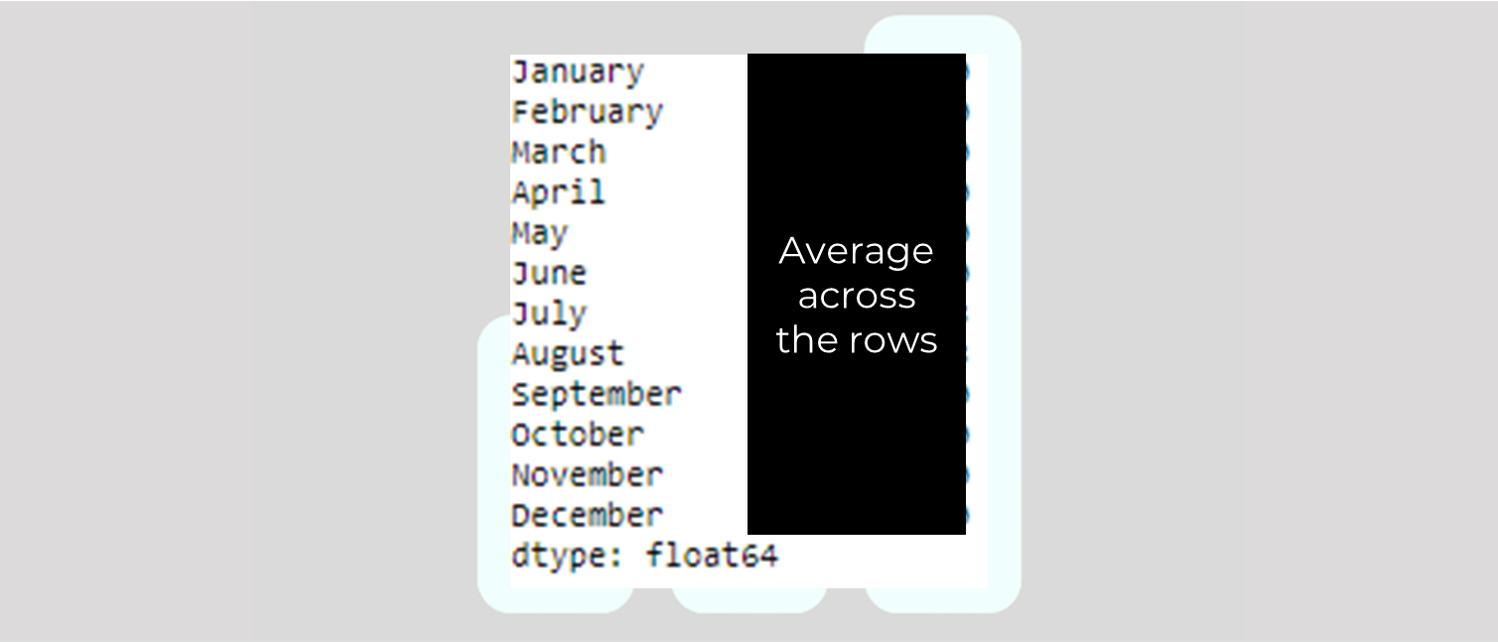

You should see something like this. If the order of the months is wrong, make sure you arranged the columns properly in Step 11.

In [26]:
# Step 12a: Get the average of months in H1.csv

h1_monthly_avg = h1_col_reorder.mean().reset_index()
h1_monthly_avg = h1_monthly_avg.rename(columns={"ArrivalDateMonth":"ArrivalDateMonth", 0:"Count"})
print(h1_monthly_avg)


   ArrivalDateMonth        Count
0           January  1096.500000
1          February  1551.500000
2             March  1668.000000
3             April  1804.500000
4               May  1779.500000
5              June  1522.500000
6              July  1524.333333
7            August  1631.333333
8         September  1554.000000
9           October  1777.500000
10         November  1218.500000
11         December  1324.000000


In [25]:
# Step 12b: Get the average of months in H2.csv

h2_monthly_avg = h2_col_reorder.mean().reset_index()
h2_monthly_avg = h2_monthly_avg.rename(columns={"ArrivalDateMonth":"ArrivalDateMonth", 0:"Count"})
print(h2_monthly_avg)

   ArrivalDateMonth        Count
0           January  1868.000000
1          February  2482.500000
2             March  3229.000000
3             April  3740.000000
4               May  4116.000000
5              June  3947.000000
6              July  2696.000000
7            August  2994.333333
8         September  3700.000000
9           October  3802.500000
10         November  2178.500000
11         December  2066.000000


### Step 13: Plot your averages in the same diagram
<blockquote>How seasonal are the bookings throughout the year?</blockquote>
Phew, that was a lot of work to get the averages. With your averages, you can answer this question posed by your boss.

To answer this question, plot your two averages on the same plot and observe the patterns. 

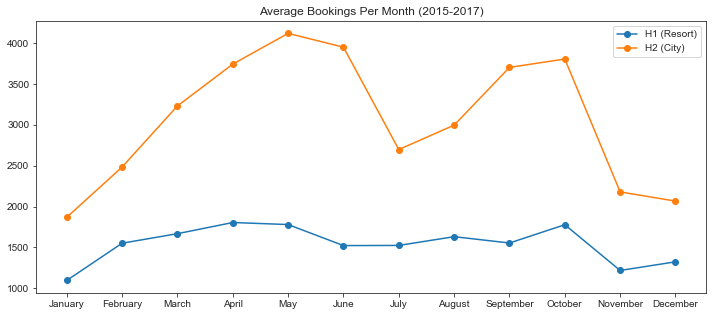

In [61]:
# Step 13: Plot the two averages in the same plot

plt.close("all")
plt.figure(figsize=(12,5))
plt.plot(h1_monthly_avg["ArrivalDateMonth"],h1_monthly_avg["Count"], marker="o", label="H1 (Resort)")
plt.plot(h2_monthly_avg["ArrivalDateMonth"],h2_monthly_avg["Count"], marker="o", label="H2 (City)")
plt.legend()
plt.title("Average Bookings Per Month (2015-2017)")
plt.show()

### [Optional] Normalize the values in each average and plot
If you plotted the raw values of each month-averages, you'd find that the difference in scale may make it harder to identify the seasonal variation in H1.csv.

To solve this, we can just divide the values in each list by the respective maximum value in the list for normalization.

For example, if you have a list that goes [1, 2, 3, 4, 5], you normalize the list by dividing everything inside by 5 so you'd get [0.2, 0.4, 0.6, 0.8, 1.0]. 

After normalizing the values, plot the normalized averages again. The normalized average plots will make it easier for you to compare the two. 

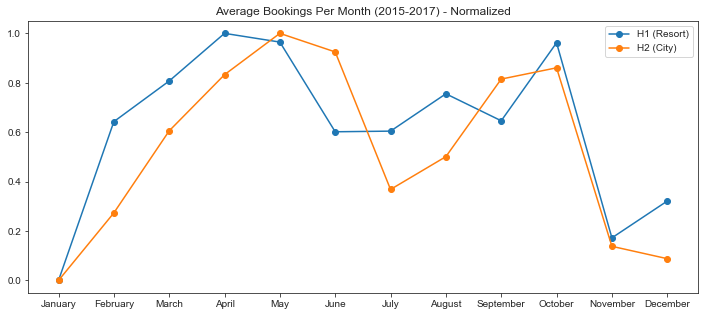

In [64]:
# Normalize the averages and replot them

from sklearn.preprocessing import MinMaxScaler
h1_count_normalized = MinMaxScaler().fit_transform(np.array(h1_monthly_avg["Count"]).reshape(-1,1))
h1_monthly_avg["CountNormalized"] = h1_count_normalized
h2_count_normalized = MinMaxScaler().fit_transform(np.array(h2_monthly_avg["Count"]).reshape(-1,1))
h2_monthly_avg["CountNormalized"] = h2_count_normalized

plt.close("all")
plt.figure(figsize=(12,5))
plt.plot(h1_monthly_avg["ArrivalDateMonth"],h1_monthly_avg["CountNormalized"], marker="o", label="H1 (Resort)")
plt.plot(h2_monthly_avg["ArrivalDateMonth"],h2_monthly_avg["CountNormalized"], marker="o", label="H2 (City)")
plt.legend()
plt.title("Average Bookings Per Month (2015-2017) - Normalized")
plt.show()


### End of Part III
In this part, we performed several comparisons between the two hotel datasets to answer business-related questions. This was done through a combination of visualization and statistical testing. 

Next, in Part IV, we will perform feature engineering on the dataset before going into machine learning modelling in Part V.